In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt
from itertools import count
import pickle
import preprocessor as p

In [3]:
## Load 2- to 5-gram CountVectorizer Models
tf_2 = pickle.load(open('/Users/mac/Desktop/Yale/courses/CBB 750/Project/Results/phase2/Models/tf2.sav', 'rb'))
tf_3 = pickle.load(open('/Users/mac/Desktop/Yale/courses/CBB 750/Project/Results/phase2/Models/tf3.sav', 'rb'))
tf_4 = pickle.load(open('/Users/mac/Desktop/Yale/courses/CBB 750/Project/Results/phase2/Models/tf4.sav', 'rb'))
tf_5 = pickle.load(open('/Users/mac/Desktop/Yale/courses/CBB 750/Project/Results/phase2/Models/tf5.sav', 'rb'))

In [4]:
## Load anti and pro vaccine data
data_anti = pd.read_csv('/Users/mac/Desktop/Yale/courses/CBB 750/Project/Data/vaccine_sentiment_210417/vaccine_anti.csv')
data_pro = pd.read_csv('/Users/mac/Desktop/Yale/courses/CBB 750/Project/Data/vaccine_sentiment_210417/vaccine_pro.csv')

In [5]:
print(data_anti.shape)
print(data_pro.shape)

(10000, 23)
(10000, 23)


In [6]:
## Drop duplicates
data_anti = data_anti.drop_duplicates()
data_pro = data_pro.drop_duplicates()

In [7]:
data_anti['label'] = 'anti'
data_pro['label'] = 'pro'
data = pd.concat([data_anti, data_pro])
data.shape

(17811, 24)

In [8]:
## Retweet pattern
p = re.compile('^RT @(.*?):')

In [9]:
## Extract retweeted users
connect_node = []
for text in data['message']:
    if text[:4] == "RT @":
        connect_node.append(re.search(p,text).group(1))
    else:
        connect_node.append('')
connect_node

['RahulGandhi',
 'RahulGandhi',
 'donal_de_burca',
 'RahulGandhi',
 'CelestineBee',
 '',
 'banthebbc',
 'RahulGandhi',
 'RahulGandhi',
 'ProfMaskoff',
 'CelestineBee',
 'JamesMelville',
 'JamesMelville',
 '',
 'RahulGandhi',
 'ShannonJoyRadio',
 'RahulGandhi',
 '',
 'RahulGandhi',
 'RahulGandhi',
 'RahulGandhi',
 'RahulGandhi',
 '',
 '',
 'RahulGandhi',
 'RahulGandhi',
 'RahulGandhi',
 '',
 'RahulGandhi',
 'RahulGandhi',
 'RahulGandhi',
 'RahulGandhi',
 'RahulGandhi',
 'RahulGandhi',
 'RahulGandhi',
 'RahulGandhi',
 'CelestineBee',
 '',
 '',
 'prisoner1968',
 'RahulGandhi',
 'RahulGandhi',
 'RahulGandhi',
 'DonaldWelsh16',
 'JamesMelville',
 'rakeshsharma767',
 'RahulGandhi',
 'RahulGandhi',
 'RahulGandhi',
 'RahulGandhi',
 'JamesMelville',
 'JamesMelville',
 'RahulGandhi',
 'RahulGandhi',
 'RahulGandhi',
 'RahulGandhi',
 'RahulGandhi',
 'RahulGandhi',
 'RahulGandhi',
 'prisoner1968',
 'RahulGandhi',
 'RahulGandhi',
 'theflowernurse',
 '',
 'RahulGandhi',
 'DollarVigilante',
 'RahulGan

In [10]:
## Add retweeted users to a new column
data['retweet_name'] = connect_node
data = data[data.retweet_name != '']
print(data.shape)
data[['message', 'screenname', 'label', 'retweet_name']].head(6)

(12371, 25)


,message,screenname,label,retweet_name
0,"RT @RahulGandhi: We need humility, a clear vac...",mebhutani,anti,RahulGandhi
1,"RT @RahulGandhi: We need humility, a clear vac...",Deepend03620451,anti,RahulGandhi
2,RT @donal_de_burca: Fauci admits to LYING abou...,PedersenJamie,anti,donal_de_burca
3,"RT @RahulGandhi: We need humility, a clear vac...",RamGurj63650418,anti,RahulGandhi
4,RT @CelestineBee: 9/11 was an inside job Man d...,capaco21,anti,CelestineBee
7,"RT @banthebbc: VACCINE TRAGEDY ‘Healthy’ dad, ...",SouthwoldL10,anti,banthebbc


In [11]:
## Create graph
data_graph = nx.from_pandas_edgelist(
                           data,
                           source = 'screenname',
                           target = 'retweet_name',
                           create_using = nx.DiGraph())
data_graph

In [12]:
## Add labels as features
for index, row in data.iterrows():
    data_graph.nodes[row['screenname']]['label'] = row['label']
    data_graph.nodes[row['retweet_name']]['label'] = row['label']

# print(data_graph.edges())
print(data_graph.nodes(data=True))

[('mebhutani', {'label': 'anti'}), ('RahulGandhi', {'label': 'pro'}), ('Deepend03620451', {'label': 'anti'}), ('PedersenJamie', {'label': 'anti'}), ('donal_de_burca', {'label': 'anti'}), ('RamGurj63650418', {'label': 'anti'}), ('capaco21', {'label': 'pro'}), ('CelestineBee', {'label': 'pro'}), ('SouthwoldL10', {'label': 'anti'}), ('banthebbc', {'label': 'anti'}), ('rohitpanwar9999', {'label': 'anti'}), ('BajrangKumarKu3', {'label': 'anti'}), ('CatholicLady10', {'label': 'anti'}), ('ProfMaskoff', {'label': 'anti'}), ('Julie34479', {'label': 'pro'}), ('Preciosa36', {'label': 'anti'}), ('JamesMelville', {'label': 'pro'}), ('DaveyRaveyWavey', {'label': 'anti'}), ('_rafatkhan', {'label': 'anti'}), ('JohnMappin', {'label': 'pro'}), ('ShannonJoyRadio', {'label': 'pro'}), ('Iamshakirhusen', {'label': 'anti'}), ('EverywhereAmit', {'label': 'pro'}), ('shrivatsc', {'label': 'anti'}), ('WattiYash', {'label': 'anti'}), ('Sangeet83538781', {'label': 'anti'}), ('Vishvakarma09', {'label': 'anti'}), ('

In [30]:
print(data_graph.number_of_nodes())
print(data_graph.number_of_edges())

13851
12221


In [13]:
## Remove nodes with out degree == 0
outdeg = data_graph.out_degree()
to_keep = [n for (n, deg) in outdeg if deg > 0]
data_sub_graph = data_graph.subgraph(to_keep)
print(data_sub_graph.number_of_nodes())
print(data_sub_graph.number_of_edges())

11529
881


In [14]:
## Convert to undirected graph
data_sub_graph = data_sub_graph.to_undirected()

In [15]:
## Remove nodes with degree == 0
deg_all = data_sub_graph.degree()
to_keep = [n for (n, deg) in deg_all if deg > 0]
data_sub_graph_fil = data_sub_graph.subgraph(to_keep)
print(data_sub_graph_fil.number_of_nodes())
print(data_sub_graph_fil.number_of_edges())

930
880


In [16]:
## Get the largest connected component
largest_cc = max(nx.connected_components(data_sub_graph_fil), key=len)
largest_cc

{'265lisa',
 '2NjoyMore',
 'AbdulHamidalRa2',
 'Andyrhno1',
 'AngelaPower7',
 'AngieNewson',
 'Ann20407762',
 'Anthony35239050',
 'ArtDodger',
 'Austinfoy77',
 'Axarya',
 'BarbaraGoggin4',
 'BeginYourGrowth',
 'Bella76908681',
 'BlackSwan5634',
 'Bob261048',
 'BoomFooty',
 'BryninLiz',
 'BurcherClaire',
 'ButtiGrazia',
 'CHRISTI11638367',
 'Cadisbikes',
 'CalGalRed4Life',
 'CandyNasir',
 'Carlos59182445',
 'CarolynJulia211',
 'Chasetherabbit',
 'CherylGrainger4',
 'ChikaNeo',
 'ChrisNeOublie',
 'ClaireH37444648',
 'CleggMadi',
 'CliveRhymester',
 'CrazyFlowers5',
 'DAVIDVGOLIATH',
 'DMR2cor520',
 'DTochinskiy',
 'DailyExposeNews',
 'DailyExposeUK',
 'Dancingmaduk',
 'Danielle14444',
 'Davidakky71',
 'DeanParise',
 'DebraHann6',
 'DebraLynnhendr1',
 'Deene20919373',
 'DickiebirdBrown',
 'DonnaRedman9',
 'DrNoMask',
 'Dragonsoul9Fire',
 'DreamJeanie73',
 'Driz72',
 'Eddie1771369',
 'Fredthefish2',
 'Freespi34425133',
 'Funtime21204577',
 'GBilleci9',
 'George96531446',
 'Gillianabeth',
 

In [17]:
## Subset text data with records belonging to the subgraph
data_blob = data[data['screenname'].isin(largest_cc)]
data_blob

,tweetid,name,inreplyuserid,createdat,timezone,friendscount,accountcreated,location,userid,xcoordinate,...,retweetcount,utcoffset,ycoordinate,dataagent,place,inreplyscreenname,category,annotation,label,retweet_name
18,1383427372104388612,CAMELOT CASTLE TV NETWORK - FREEDOM IS THE GRAIL,-1,2021-04-17 14:29:23,None,4346,Thu Dec 29 18:31:09 +0000 2011,"England, United Kingdom",449974837,None,...,0,None,None,JS Listener,None,None,vaccine,-1,anti,ShannonJoyRadio
44,1383427261857099781,1973 🌸,-1,2021-04-17 14:28:56,None,916,Fri Apr 10 18:33:14 +0000 2009,None,30279506,None,...,0,None,None,JS Listener,None,None,vaccine,-1,anti,prisoner1968
64,1383425051974725646,Peter Bucksey,-1,2021-04-17 14:20:09,None,183,Mon Aug 06 15:04:26 +0000 2012,The North West.,740803826,None,...,0,None,None,JS Listener,None,None,vaccine,-1,anti,prisoner1968
67,1383425032748036104,Joel Savage: Journalist / Author,-1,2021-04-17 14:20:05,None,5626,Fri Jul 22 14:13:15 +0000 2011,"Antwerp, #Brussels-Belgium.",340316983,None,...,0,None,None,JS Listener,None,None,vaccine,-1,anti,theflowernurse
702,1383413270648741890,AngieN,-1,2021-04-17 13:33:20,None,1083,Mon Mar 12 18:08:28 +0000 2012,"London, UK",522458295,None,...,0,None,None,JS Listener,None,None,vaccine,-1,anti,prisoner1968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9187,1383338095160881155,Liz Brynin,-1,2021-04-17 08:34:37,None,34,Thu Aug 29 08:47:09 +0000 2019,Hove,1166995619275321345,None,...,0,None,None,JS Listener,None,None,vaccine,1,pro,DailyExposeNews
9193,1383338087015583749,Angela Power Supports #BackTo60 #NoMasks #KBF,-1,2021-04-17 08:34:35,None,4970,Wed Jul 25 13:20:21 +0000 2012,United Kingdom,716055577,None,...,0,None,None,JS Listener,None,None,vaccine,1,pro,ChrisWickNews
9200,1383338071324721161,Liz Brynin,-1,2021-04-17 08:34:32,None,34,Thu Aug 29 08:47:09 +0000 2019,Hove,1166995619275321345,None,...,0,None,None,JS Listener,None,None,vaccine,1,pro,Michaelcave6
9712,1383331221728493572,Marcy🌸,-1,2021-04-17 08:07:18,None,357,Fri Sep 11 14:31:19 +0000 2020,None,1304427225555632128,None,...,0,None,None,JS Listener,None,None,vaccine,1,pro,GauteNilsen


<AxesSubplot:>

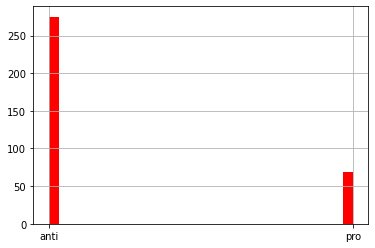

In [18]:
## Get label distribution
data_blob['label'].hist(bins = 30, color = 'r')

In [248]:
## set up punctuations we want to be replaced
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")


def clean_tweets(df):
    tempArr = []
    for line in df:
        #send to tweet_processor
        tmpL = p.clean(line)
        #remove puctuation
        tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
        tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
        tempArr.append(tmpL)
    return tempArr

In [251]:
## Add cleaned tweet to a new column
data_blob['Clean_tweet'] = clean_tweets(data_blob['message'])
data_blob.head(10)

/Users/mac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tweetid,name,inreplyuserid,createdat,timezone,friendscount,accountcreated,location,userid,xcoordinate,...,utcoffset,ycoordinate,dataagent,place,inreplyscreenname,category,annotation,label,tagged_name,Clean_tweet
18,1383427372104388612,CAMELOT CASTLE TV NETWORK - FREEDOM IS THE GRAIL,-1,2021-04-17 14:29:23,None,4346,Thu Dec 29 18:31:09 +0000 2011,"England, United Kingdom",449974837,None,...,None,None,JS Listener,None,None,vaccine,-1,anti,ShannonJoyRadio,as vaccine trials on babies ramp up expect t...
44,1383427261857099781,1973 🌸,-1,2021-04-17 14:28:56,None,916,Fri Apr 10 18:33:14 +0000 2009,None,30279506,None,...,None,None,JS Listener,None,None,vaccine,-1,anti,prisoner1968,astrazeneca are forbidden to mention adverse ...
64,1383425051974725646,Peter Bucksey,-1,2021-04-17 14:20:09,None,183,Mon Aug 06 15:04:26 +0000 2012,The North West.,740803826,None,...,None,None,JS Listener,None,None,vaccine,-1,anti,prisoner1968,astrazeneca are forbidden to mention adverse ...
67,1383425032748036104,Joel Savage: Journalist / Author,-1,2021-04-17 14:20:05,None,5626,Fri Jul 22 14:13:15 +0000 2011,"Antwerp, #Brussels-Belgium.",340316983,None,...,None,None,JS Listener,None,None,vaccine,-1,anti,theflowernurse,former nyt writer us qvaccine adverse events ...
702,1383413270648741890,AngieN,-1,2021-04-17 13:33:20,None,1083,Mon Mar 12 18:08:28 +0000 2012,"London, UK",522458295,None,...,None,None,JS Listener,None,None,vaccine,-1,anti,prisoner1968,astrazeneca are forbidden to mention adverse ...
730,1383410448901369858,Trendz 🙂,-1,2021-04-17 13:22:08,None,670,Fri Nov 07 22:45:25 +0000 2014,None,2866520392,None,...,None,None,JS Listener,None,None,vaccine,-1,anti,prisoner1968,astrazeneca are forbidden to mention adverse ...
734,1383408390110547968,CAMELOT CASTLE TV NETWORK - FREEDOM IS THE GRAIL,-1,2021-04-17 13:13:57,None,4347,Thu Dec 29 18:31:09 +0000 2011,"England, United Kingdom",449974837,None,...,None,None,JS Listener,None,None,vaccine,-1,anti,conspiracyguy78,mysterious death of a man who died just hours...
744,1383408167359434767,CAMELOT CASTLE TV NETWORK - FREEDOM IS THE GRAIL,-1,2021-04-17 13:13:04,None,4347,Thu Dec 29 18:31:09 +0000 2011,"England, United Kingdom",449974837,None,...,None,None,JS Listener,None,None,vaccine,-1,anti,nick_the_geek78,why is every covid death tragic but blood clo...
798,1383401429235245064,Daniel Tochinskiy,-1,2021-04-17 12:46:17,None,2032,Mon Mar 23 23:47:11 +0000 2009,Central Florida,26123893,None,...,None,None,JS Listener,None,None,vaccine,-1,anti,prisoner1968,astrazeneca are forbidden to mention adverse ...
844,1383395002554802185,Donna Redman,-1,2021-04-17 12:20:45,None,1604,Sun Apr 17 15:37:35 +0000 2016,None,721724292698923009,None,...,None,None,JS Listener,None,None,vaccine,-1,anti,prisoner1968,astrazeneca are forbidden to mention adverse ...


In [278]:
data_blob.to_csv('/Users/mac/Desktop/Yale/courses/CBB 750/Project/Results/phase2/data_blob.csv')  

In [279]:
## Transform the data to count matrix
full_matrix_2 = pd.DataFrame(tf_2.transform(data_blob['Clean_tweet']).todense(),columns=tf_2.get_feature_names(), index=data_blob['screenname'])
full_matrix_2.to_csv('/Users/mac/Desktop/Yale/courses/CBB 750/Project/Results/phase2/mat_2gram_blob.csv')  
full_matrix_3 = pd.DataFrame(tf_3.transform(data_blob['Clean_tweet']).todense(),columns=tf_3.get_feature_names(), index=data_blob['screenname'])
full_matrix_3.to_csv('/Users/mac/Desktop/Yale/courses/CBB 750/Project/Results/phase2/mat_3gram_blob.csv')  
full_matrix_4 = pd.DataFrame(tf_4.transform(data_blob['Clean_tweet']).todense(),columns=tf_4.get_feature_names(), index=data_blob['screenname'])
full_matrix_4.to_csv('/Users/mac/Desktop/Yale/courses/CBB 750/Project/Results/phase2/mat_4gram_blob.csv')  
full_matrix_5 = pd.DataFrame(tf_5.transform(data_blob['Clean_tweet']).todense(),columns=tf_5.get_feature_names(), index=data_blob['screenname'])
full_matrix_5.to_csv('/Users/mac/Desktop/Yale/courses/CBB 750/Project/Results/phase2/mat_5gram_blob.csv')  

In [21]:
## Subset the largest subgraph
blob = data_sub_graph_fil.subgraph(largest_cc).copy()

print(blob.number_of_nodes())
print(blob.number_of_edges())

239
244


/Users/mac/anaconda3/lib/python3.7/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Error: remove_overlap: Graphviz not built with triangulation library

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


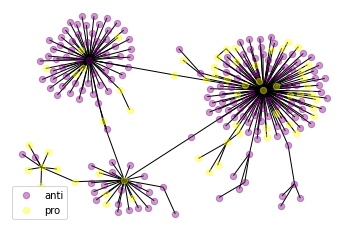

In [22]:
## Plot the subgraph
nodes = blob.nodes

nodes_yellow = dict()
nodes_purple = dict()
# Iterate over all the items in dictionary and filter items which has even keys
for (key, value) in nodes.items():
   # Check if key is even then add pair to new dictionary
    if value['label'] == 'pro':
        nodes_yellow[key] = value
    else:
        nodes_purple[key] = value
        
groups = set(nx.get_node_attributes(blob,'label').values())
mapping = dict(zip(sorted(groups),count()))
pos = nx.drawing.nx_agraph.graphviz_layout(blob, prog='sfdp', root=None)
# nx.draw_networkx_nodes(blob, pos, alpha=.4, node_color=colors, node_size = 50)
nx.draw_networkx_nodes(blob, pos=pos, nodelist=nodes_purple,
                       node_color='purple', label='anti', alpha=.4, node_size = 40)
nx.draw_networkx_nodes(blob, pos=pos, nodelist=nodes_yellow,
                       node_color='yellow', label='pro', alpha=.4, node_size = 40)

# edges
nx.draw_networkx_edges(blob, pos, width=1, alpha=1)
plt.axis("off")
plt.legend(scatterpoints = 1)
plt.show()

(array([178.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  61.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

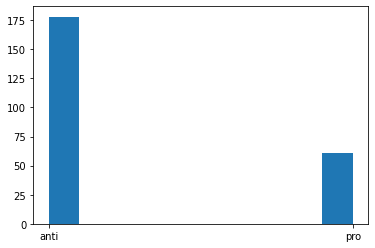

In [33]:
## Get label distribution
plt.hist(nx.get_node_attributes(blob,'label').values())

In [39]:
pd.DataFrame(nx.get_node_attributes(blob,'label').values()).value_counts()

anti    178
pro      61
dtype: int64

In [276]:
## Get adjacency matrix
A = nx.adjacency_matrix(blob)
np.mean(A)
A.shape

(239, 239)

In [277]:
A = pd.DataFrame(A.todense(), index=list(blob.nodes), columns=list(blob.nodes))
A.to_csv('/Users/mac/Desktop/Yale/courses/CBB 750/Project/Results/phase2/adj_blob.csv')  

In [49]:
## Get nodes from the two groups
nodes = data_sub_graph_fil.nodes

nodes_yellow = dict()
nodes_purple = dict()
# Iterate over all the items in dictionary and filter items which has even keys
for (key, value) in nodes.items():
   # Check if key is even then add pair to new dictionary
    if value['label'] == 'pro':
        nodes_yellow[key] = value
    else:
        nodes_purple[key] = value

In [50]:
nodes_yellow

{'Chomu93595499': {'label': 'pro'},
 'GeorgekurianINC': {'label': 'pro'},
 'n_shekar': {'label': 'pro'},
 'PankajS09547451': {'label': 'pro'},
 'Oshomoksha': {'label': 'pro'},
 'jaycaper': {'label': 'pro'},
 'molematz': {'label': 'pro'},
 'SmithSeigel1': {'label': 'pro'},
 'fxdamus': {'label': 'pro'},
 'DarthSmeagle': {'label': 'pro'},
 'Parthiban2900': {'label': 'pro'},
 'mahikullu': {'label': 'pro'},
 'NatashaForder': {'label': 'pro'},
 'whoisizzvh': {'label': 'pro'},
 'satheeshk1960': {'label': 'pro'},
 'liyannaahmad': {'label': 'pro'},
 'melloummu': {'label': 'pro'},
 'chandnimathur5': {'label': 'pro'},
 'bigsanturi': {'label': 'pro'},
 'tessabubu': {'label': 'pro'},
 'hilmiputraa_': {'label': 'pro'},
 'CHRISTI11638367': {'label': 'pro'},
 'GVK_Karan71': {'label': 'pro'},
 'Mikeluvtofu': {'label': 'pro'},
 'MaizyDaizyZzzz': {'label': 'pro'},
 'BNVDSPRAKASH1': {'label': 'pro'},
 'ssh4dyy': {'label': 'pro'},
 'BRAVENEWEUROPE1': {'label': 'pro'},
 'SteveG06322664': {'label': 'pro'},
 

In [51]:
nodes_purple

{'Phil33454': {'label': 'anti'},
 'CHANDAFINCH8': {'label': 'anti'},
 'CherylGrainger4': {'label': 'anti'},
 'Chasetherabbit': {'label': 'anti'},
 'Xenos42697881': {'label': 'anti'},
 'pruseluskan1': {'label': 'anti'},
 'ems56rn': {'label': 'anti'},
 'PastorFlaps0k': {'label': 'anti'},
 'PJMoore1958': {'label': 'anti'},
 'TheMeck': {'label': 'anti'},
 'MrGoose59899263': {'label': 'anti'},
 'TrinaSolis17': {'label': 'anti'},
 'InfoBears': {'label': 'anti'},
 'JYochez': {'label': 'anti'},
 'diamondsforex': {'label': 'anti'},
 'Makedni': {'label': 'anti'},
 'Thefletch123': {'label': 'anti'},
 'DebraLynnhendr1': {'label': 'anti'},
 'sherrymccarter': {'label': 'anti'},
 'monaghaaskycom1': {'label': 'anti'},
 'Deene20919373': {'label': 'anti'},
 '29361RMSM': {'label': 'anti'},
 'furry_tyson': {'label': 'anti'},
 'MarkLil05744037': {'label': 'anti'},
 'jonnyhodl': {'label': 'anti'},
 'Elenaforever13': {'label': 'anti'},
 'DebraHann6': {'label': 'anti'},
 'Sanastasea1': {'label': 'anti'},
 'Ke

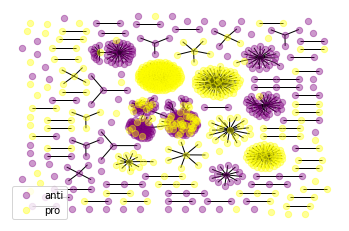

In [58]:
## Plot the whole graph
groups = set(nx.get_node_attributes(data_sub_graph_fil,'label').values())
mapping = dict(zip(sorted(groups),count()))

fig, ax = plt.subplots()
pos = nx.drawing.nx_agraph.graphviz_layout(data_sub_graph_fil, prog='sfdp', root=None)
nx.draw_networkx_nodes(data_sub_graph_fil, pos=pos, nodelist=nodes_purple,
                       node_color='purple', label='anti', alpha=.4, node_size = 40)
nx.draw_networkx_nodes(data_sub_graph_fil, pos=pos, nodelist=nodes_yellow,
                       node_color='yellow', label='pro', alpha=.4, node_size = 40)
# edges
nx.draw_networkx_edges(data_sub_graph_fil, pos, width=1, alpha=1)
plt.axis("off")

plt.legend(scatterpoints = 1)
plt.show()